Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

In [2]:
#conda install -c conda-forge opencv

In [3]:
import zipfile
with zipfile.ZipFile('./image_classification_data.zip', 'r') as zip_ref:
    zip_ref.extractall('./')
    

In [4]:
data = pd.read_csv('./image_classification_data/data_labels_mainData.csv')
extra_data = pd.read_csv('./image_classification_data/data_labels_extraData.csv') 

In [5]:
data

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


In [6]:
extra_data.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


In [7]:
image_folder = "image_classification_data/patch_images/"


In [8]:
#Adding image path to the dataframe
data['image_path'] = image_folder + data['ImageName']


In [9]:
#Adding image path to the dataframe
extra_data['image_path'] = image_folder + extra_data['ImageName']

In [10]:
extra_data.head()

,InstanceID,patientID,ImageName,isCancerous,image_path
0,12681,61,12681.png,0,image_classification_data/patch_images/12681.png
1,12682,61,12682.png,0,image_classification_data/patch_images/12682.png
2,12683,61,12683.png,0,image_classification_data/patch_images/12683.png
3,12684,61,12684.png,0,image_classification_data/patch_images/12684.png
4,12685,61,12685.png,0,image_classification_data/patch_images/12685.png


In [11]:
#Storing the image data in a list
def load_image(path):
    with Image.open(path) as img:
        return img

images = [load_image(path) for path in data['image_path']]

In [12]:
image_dimensions = []

# Iterate through the images
for image_path in data['image_path']:
    with Image.open(image_path) as img:
        # Get the height and width of the image
        width, height = img.size
        image_dimensions.append((width, height))

# Check if all image dimensions are the same
same_dimensions = all(dim == image_dimensions[0] for dim in image_dimensions)

if same_dimensions:
    print("All images have the same dimensions.")
else:
    print("Images have different dimensions.")

All images have the same dimensions.


In [13]:
channel=[]
for image in images:
    channels = image.mode
    channel.append(channels)
    


In [14]:
from collections import Counter
counts = Counter(channel)
for element, count in counts.items():
    print(f"{element}: {count}")

RGB: 9896


In [15]:
data.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,image_path
0,22405,1,22405.png,fibroblast,0,0,image_classification_data/patch_images/22405.png
1,22406,1,22406.png,fibroblast,0,0,image_classification_data/patch_images/22406.png
2,22407,1,22407.png,fibroblast,0,0,image_classification_data/patch_images/22407.png
3,22408,1,22408.png,fibroblast,0,0,image_classification_data/patch_images/22408.png
4,22409,1,22409.png,fibroblast,0,0,image_classification_data/patch_images/22409.png


In [16]:
images

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.Pn

pip install --upgrade Pillow

In [17]:
#Checking for missing values in the dataset

In [18]:
data.isnull().sum()

InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
image_path      0
dtype: int64

In [19]:
data.cellTypeName.value_counts()

epithelial      4079
inflammatory    2543
fibroblast      1888
others          1386
Name: cellTypeName, dtype: int64

In [20]:
data.cellType.value_counts()

2    4079
1    2543
0    1888
3    1386
Name: cellType, dtype: int64

In [21]:
data.isCancerous.value_counts()

0    5817
1    4079
Name: isCancerous, dtype: int64

<AxesSubplot:xlabel='isCancerous', ylabel='Count'>

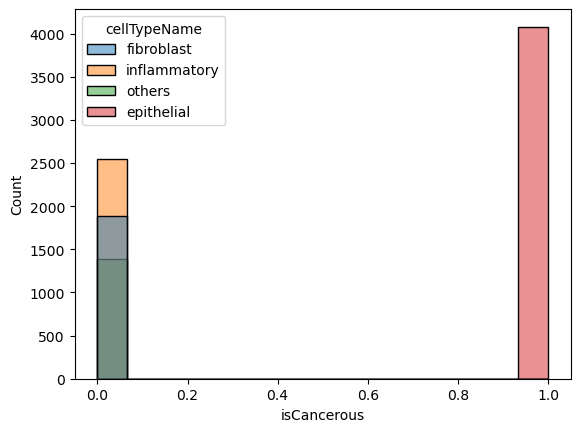

In [22]:
sns.histplot(data,x='isCancerous',hue="cellTypeName")

<AxesSubplot:xlabel='cellTypeName', ylabel='Count'>

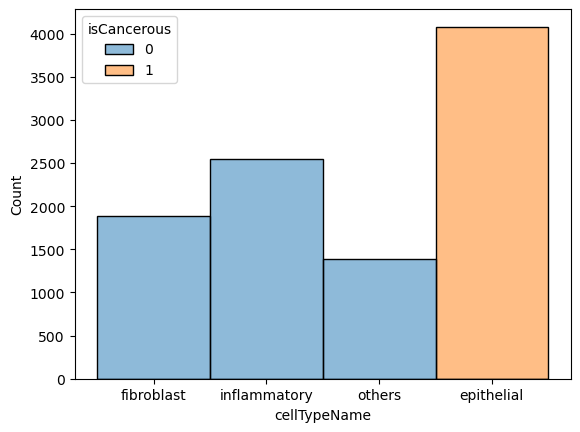

In [23]:
sns.histplot(data,x='cellTypeName',hue="isCancerous")

dropping instance id as it is not relevant to the findings

In [24]:
data = data.drop('InstanceID',axis=1)

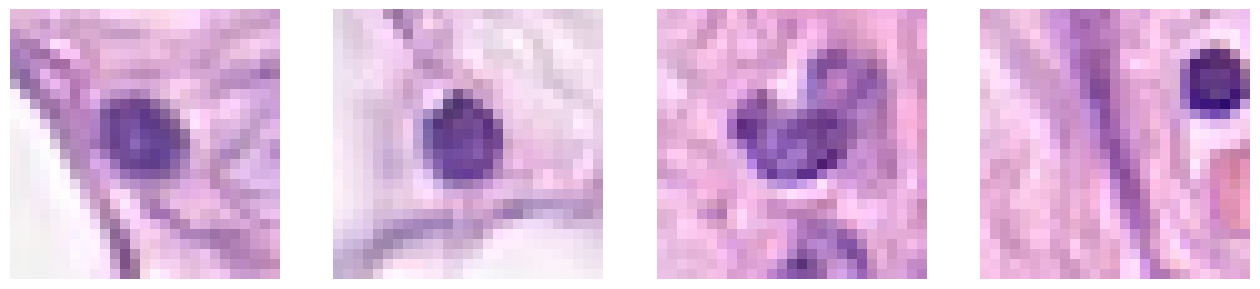

In [25]:
r_inx = np.random.choice(100, 4)
rand_data = data.loc[r_inx,'image_path']

plt.figure(figsize=(16,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,4,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

Splitting into training and test sets

In [27]:
train_data,test_data = train_test_split(data, test_size=0.2, random_state=42)

In [28]:
train_data,val_data = train_test_split(train_data, test_size=0.25, random_state=42)

In [29]:
print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 5937, Val Data: 1979, Test Data: 1980


## Build the Baseline with MLP for cellType(Model 1.1 )

Starting with a baseline model which will be tuned
<br>Lets start with `HIDDEN_LAYER_DIM = 256` as the our baseline to begin with.
<br>We will use for now `optimizer = adam` it has fast convergence and adaptable learning rates.
<br>We are using `batch_size = 32`
<br>Taking random value for `Epoch = 100`
<br>Activation Function as `relu`

In [30]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 4

In [31]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

2023-05-16 15:00:31.433803: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2187)              0         
                                                                 
 dense (Dense)               (None, 256)               560128    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 561,156
Trainable params: 561,156
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [34]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5937 entries, 9533 to 9349
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   patientID     5937 non-null   int64 
 1   ImageName     5937 non-null   object
 2   cellTypeName  5937 non-null   object
 3   cellType      5937 non-null   object
 4   isCancerous   5937 non-null   int64 
 5   image_path    5937 non-null   object
dtypes: int64(2), object(4)
memory usage: 324.7+ KB


In [227]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255
)

batch_size = 32

train_generator_type = datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image_path",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator_type = datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image_path",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 4 classes.
Found 1979 validated image filenames belonging to 4 classes.


In [37]:
history = model.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=100, verbose=0)

/var/folders/sc/1ljq9fgn41xfwkqd6rv0dzgm0000gn/T/ipykernel_22356/2324903286.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=100, verbose=0)
/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


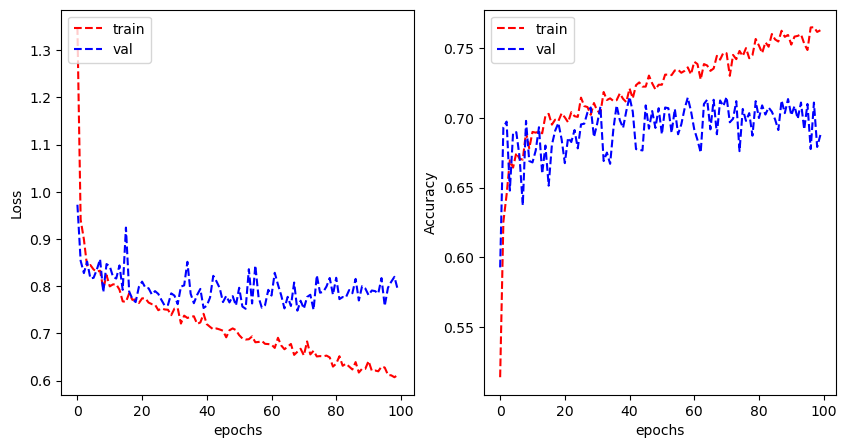

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], 'r--')
plt.plot(history.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


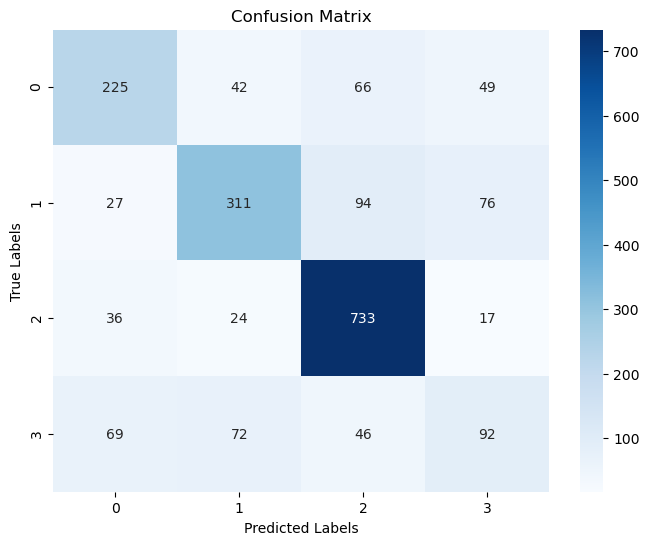

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
from sklearn.metrics import classification_report
y_pred_probs = model.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       382
           1       0.69      0.61      0.65       508
           2       0.78      0.90      0.84       810
           3       0.39      0.33      0.36       279

    accuracy                           0.69      1979
   macro avg       0.62      0.61      0.61      1979
weighted avg       0.67      0.69      0.68      1979



In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.6877210712481051
Recall: 0.6877210712481051
F1 Score: 0.6877210712481051
AUC Score: 0.8474606953780011


#### Observation

- Model is overfitted lets try reducing the epoch

## Taking epoch=50 (Model 1.2)

In [42]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 4

In [43]:
import tensorflow as tf

model_50 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [44]:
model_50.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2187)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               560128    
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 561,156
Trainable params: 561,156
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_50.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [46]:
history_50 = model_50.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=50, verbose=0)

/var/folders/sc/1ljq9fgn41xfwkqd6rv0dzgm0000gn/T/ipykernel_22356/1216271592.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_50 = model_50.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=50, verbose=0)
/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


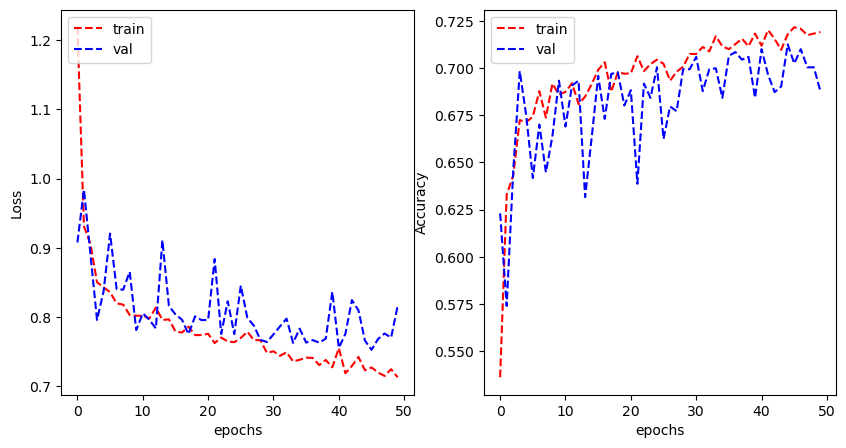

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_50.history['loss'], 'r--')
plt.plot(history_50.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_50.history['categorical_accuracy'], 'r--')
plt.plot(history_50.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


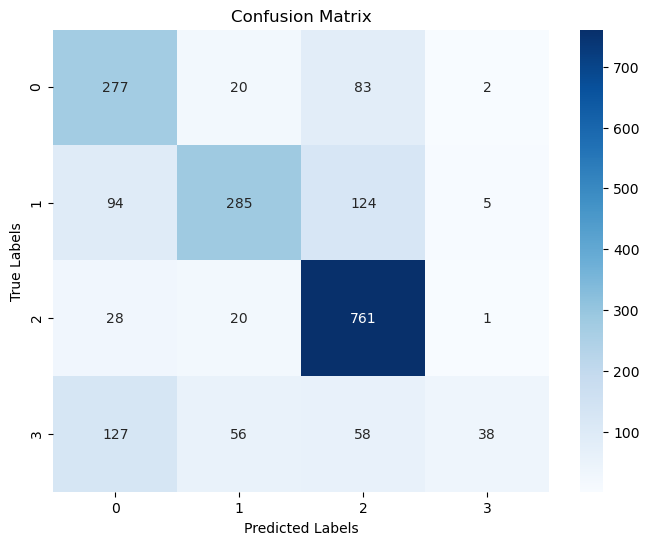

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_50.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [49]:
from sklearn.metrics import classification_report
y_pred_probs = model_50.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.73      0.61       382
           1       0.75      0.56      0.64       508
           2       0.74      0.94      0.83       810
           3       0.83      0.14      0.23       279

    accuracy                           0.69      1979
   macro avg       0.71      0.59      0.58      1979
weighted avg       0.71      0.69      0.65      1979



In [50]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_50.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.6877210712481051
Recall: 0.6877210712481051
F1 Score: 0.6877210712481051
AUC Score: 0.8498438285322429


#### observation

- Model learning rate remains constant after 30 epochs
- Lets try using 30 epochs

## Taking epoch=30 (Model 1.3)

In [51]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 4

In [52]:
import tensorflow as tf

model_30 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [53]:
model_30.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2187)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               560128    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 561,156
Trainable params: 561,156
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_30.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [55]:
history_30 = model_30.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=30, verbose=0)

/var/folders/sc/1ljq9fgn41xfwkqd6rv0dzgm0000gn/T/ipykernel_22356/1382029632.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_30 = model_30.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=30, verbose=0)
/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


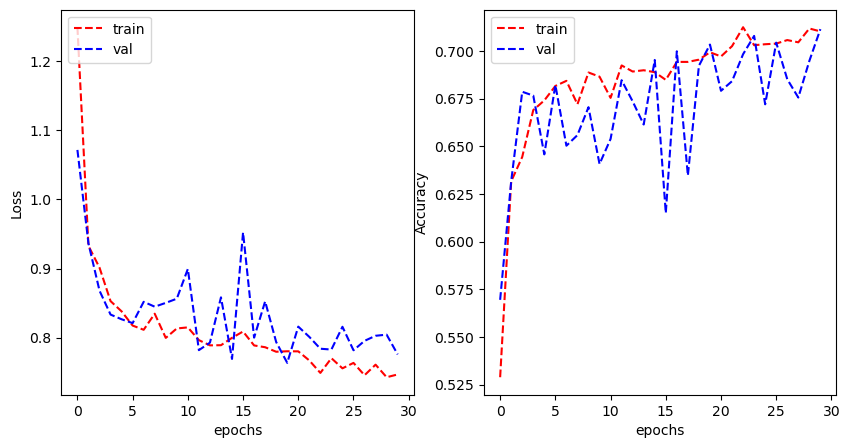

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_30.history['loss'], 'r--')
plt.plot(history_30.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_30.history['categorical_accuracy'], 'r--')
plt.plot(history_30.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


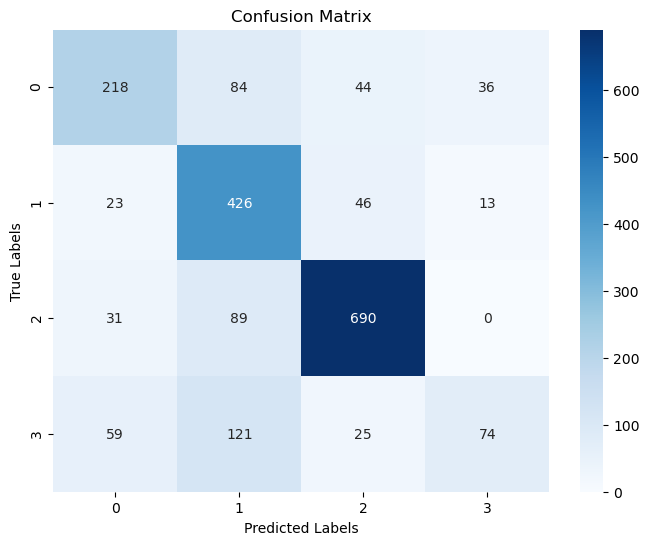

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_30.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
from sklearn.metrics import classification_report
y_pred_probs = model_30.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.57      0.61       382
           1       0.59      0.84      0.69       508
           2       0.86      0.85      0.85       810
           3       0.60      0.27      0.37       279

    accuracy                           0.71      1979
   macro avg       0.68      0.63      0.63      1979
weighted avg       0.71      0.71      0.70      1979



In [59]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_30.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7114704396159677
Recall: 0.7114704396159677
F1 Score: 0.7114704396159676
AUC Score: 0.8708712126957566


#### Observation 

- The model has not performed well in terms accuracy, F1 score, Precision, Recall and F1 score
- Increasing the complexity of the model

## Increasing the complexity of the model (1.4)

Adding a new layer to increase the complexity

In [60]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
NEW_HIDDEN_LAYER_DIM = 128
OUTPUT_CLASSES = 4

In [61]:
import tensorflow as tf

model_ly = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(NEW_HIDDEN_LAYER_DIM, activation='relu'),  # New layer
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [62]:
model_ly.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2187)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               560128    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 4)                 516       
                                                                 
Total params: 593,540
Trainable params: 593,540
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_ly.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [64]:
history_ly = model_ly.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=30, verbose=0)

/var/folders/sc/1ljq9fgn41xfwkqd6rv0dzgm0000gn/T/ipykernel_22356/2708756488.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_ly = model_ly.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=30, verbose=0)
/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


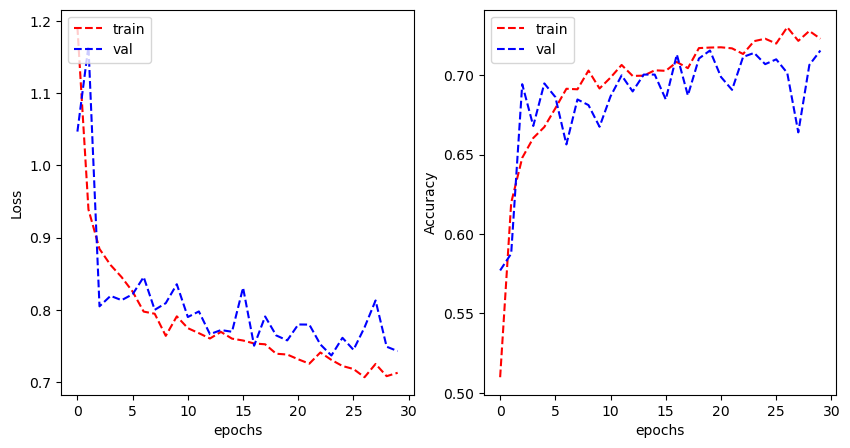

In [65]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_ly.history['loss'], 'r--')
plt.plot(history_ly.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_ly.history['categorical_accuracy'], 'r--')
plt.plot(history_ly.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


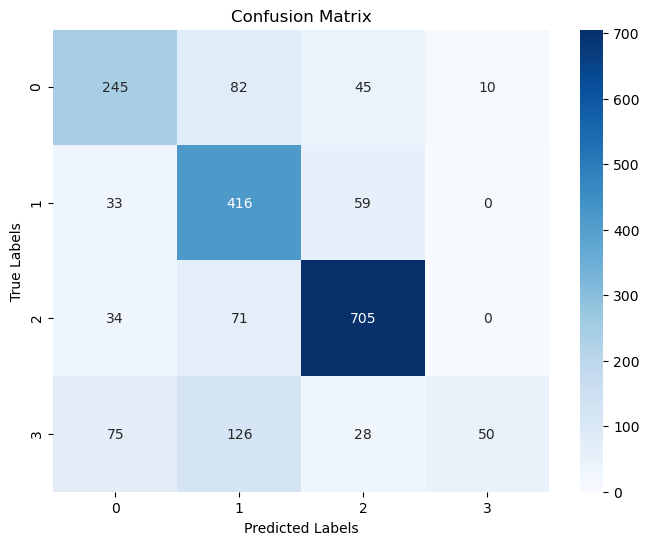

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_ly.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [67]:
from sklearn.metrics import classification_report
y_pred_probs = model_ly.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.64      0.64       382
           1       0.60      0.82      0.69       508
           2       0.84      0.87      0.86       810
           3       0.83      0.18      0.29       279

    accuracy                           0.72      1979
   macro avg       0.73      0.63      0.62      1979
weighted avg       0.74      0.72      0.69      1979



In [68]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_ly.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7155128852956039
Recall: 0.7155128852956039
F1 Score: 0.7155128852956039
AUC Score: 0.8670274572494255


#### Observation 

- The Model still didn't perform well
- lets try increasing the hidden_layer_dim

## Increasing the hidden layer dimensions (1.5)

In [69]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 512
NEW_HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 4

In [70]:
import tensorflow as tf

model_id = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(NEW_HIDDEN_LAYER_DIM, activation='relu'),  # New layer
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [71]:
model_id.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 2187)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               1120256   
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 1,252,612
Trainable params: 1,252,612
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_id.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [73]:
history_id = model_id.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=30, verbose=0)

/var/folders/sc/1ljq9fgn41xfwkqd6rv0dzgm0000gn/T/ipykernel_22356/1175240978.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_id = model_id.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=30, verbose=0)
/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


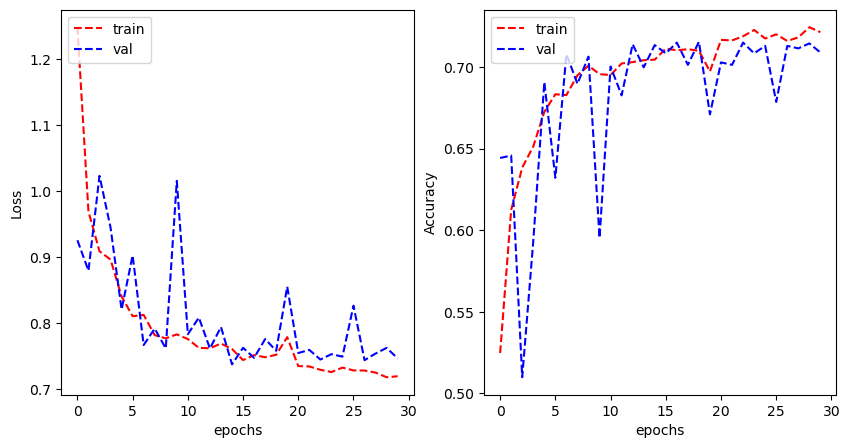

In [74]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_id.history['loss'], 'r--')
plt.plot(history_id.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_id.history['categorical_accuracy'], 'r--')
plt.plot(history_id.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


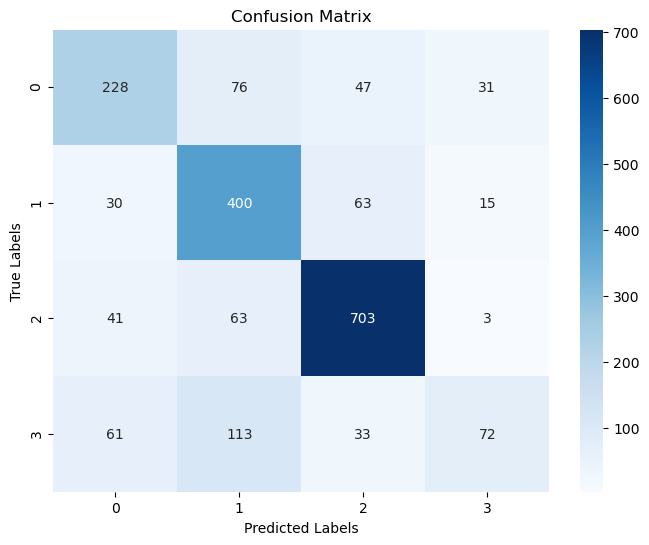

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_id.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [76]:
from sklearn.metrics import classification_report
y_pred_probs = model_id.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.60      0.61       382
           1       0.61      0.79      0.69       508
           2       0.83      0.87      0.85       810
           3       0.60      0.26      0.36       279

    accuracy                           0.71      1979
   macro avg       0.67      0.63      0.63      1979
weighted avg       0.70      0.71      0.69      1979



In [77]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_id.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.708943911066195
Recall: 0.708943911066195
F1 Score: 0.7089439110661951
AUC Score: 0.8680422296239351


#### observation

- Model has not performed well with increasing the hidden layer dimension
- So lets try adding a third hidden layer to see if it can improve the performance by increasing the complexity

## Increasing the hidden layer (1.6)

In [78]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
NEW_HIDDEN_LAYER_DIM = 128
NEW_NEW_HIDDEN_LAYER_DIM = 64
OUTPUT_CLASSES = 4

In [79]:
import tensorflow as tf

model_nl = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(NEW_HIDDEN_LAYER_DIM, activation='relu'),  # New layer
    tf.keras.layers.Dense(NEW_NEW_HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [80]:
model_nl.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 2187)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               560128    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 4)                 260       
                                                                 
Total params: 601,540
Trainable params: 601,540
Non-trainable params: 0
_________________________________________________________________


In [81]:
model_nl.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [82]:
history_nl = model_nl.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=30, verbose=0)

/var/folders/sc/1ljq9fgn41xfwkqd6rv0dzgm0000gn/T/ipykernel_22356/2137351376.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_nl = model_nl.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=30, verbose=0)
/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


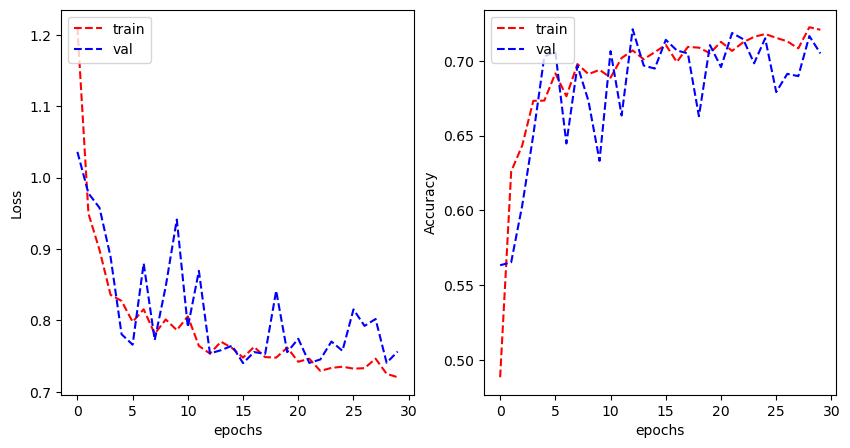

In [83]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_nl.history['loss'], 'r--')
plt.plot(history_nl.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_nl.history['categorical_accuracy'], 'r--')
plt.plot(history_nl.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


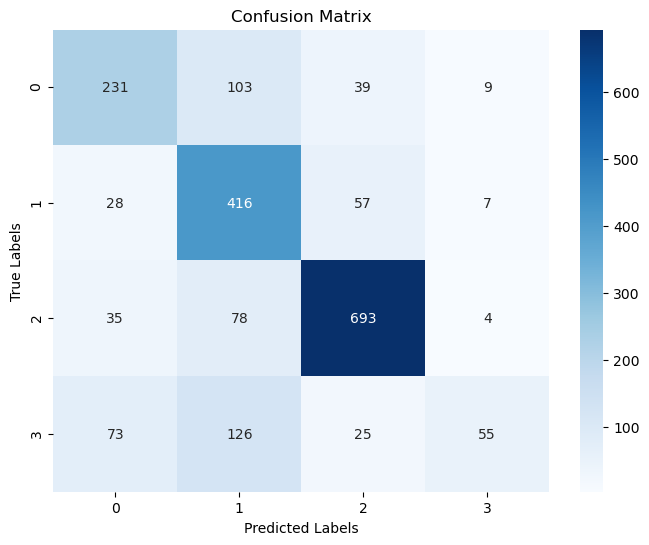

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_nl.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [85]:
from sklearn.metrics import classification_report
y_pred_probs = model_nl.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.60      0.62       382
           1       0.58      0.82      0.68       508
           2       0.85      0.86      0.85       810
           3       0.73      0.20      0.31       279

    accuracy                           0.70      1979
   macro avg       0.70      0.62      0.61      1979
weighted avg       0.72      0.70      0.69      1979



In [86]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_nl.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7049014653865588
Recall: 0.7049014653865588
F1 Score: 0.7049014653865588
AUC Score: 0.8698717107600805


#### Observation

- Model AUC score is good but overall model is still not great 
- try adding some learning rate on this model

## Using Learning rate 0.001 (Model 1.7)

In [87]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
NEW_HIDDEN_LAYER_DIM = 128
NEW_NEW_HIDDEN_LAYER_DIM = 64
OUTPUT_CLASSES = 4

In [88]:
import tensorflow as tf
lr = 0.001
model_lr = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(NEW_HIDDEN_LAYER_DIM, activation='relu'),  # New layer
    tf.keras.layers.Dense(NEW_NEW_HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [89]:
model_lr.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 2187)              0         
                                                                 
 dense_16 (Dense)            (None, 256)               560128    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 4)                 260       
                                                                 
Total params: 601,540
Trainable params: 601,540
Non-trainable params: 0
_________________________________________________________________


In [90]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model_lr.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [91]:
history_lr = model_lr.fit(train_generator_type, validation_data = validation_generator_type, epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


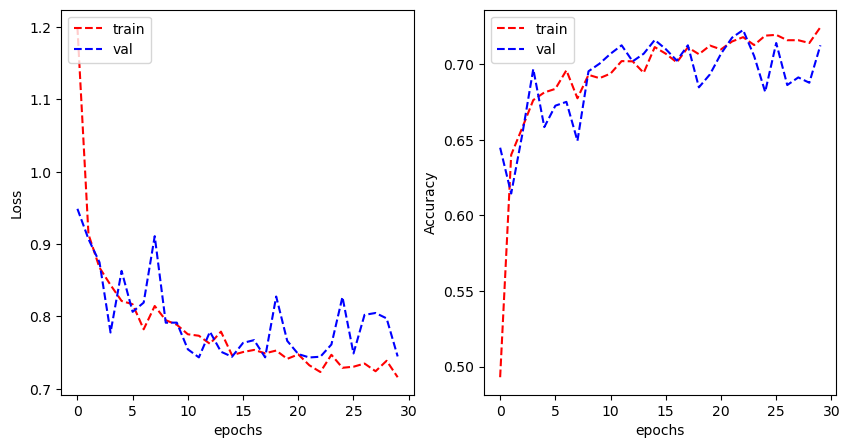

In [92]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_lr.history['loss'], 'r--')
plt.plot(history_lr.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_lr.history['categorical_accuracy'], 'r--')
plt.plot(history_lr.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


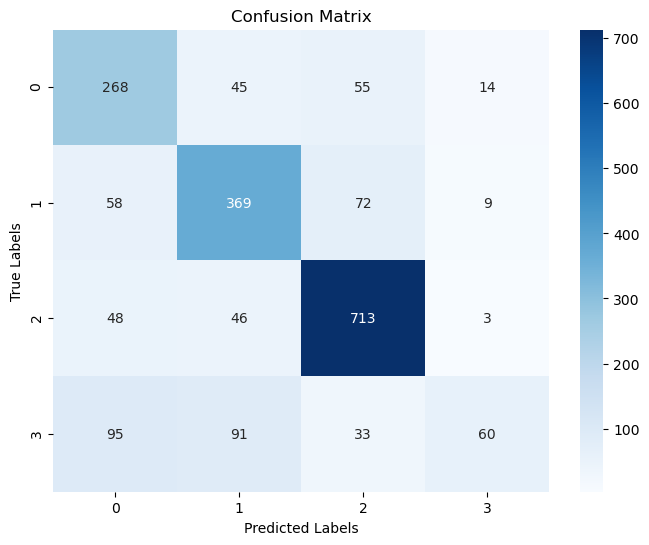

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_lr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [94]:
from sklearn.metrics import classification_report
y_pred_probs = model_lr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.57      0.70      0.63       382
           1       0.67      0.73      0.70       508
           2       0.82      0.88      0.85       810
           3       0.70      0.22      0.33       279

    accuracy                           0.71      1979
   macro avg       0.69      0.63      0.63      1979
weighted avg       0.71      0.71      0.69      1979



In [95]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_lr.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7124810510358767
Recall: 0.7124810510358767
F1 Score: 0.7124810510358767
AUC Score: 0.8726484747099407


#### Observation 

- Overall performance was worse
- lets try a higher learning rate

## Using Learning rate 0.01 (Model 1.8)

In [96]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
NEW_HIDDEN_LAYER_DIM = 128
NEW_NEW_HIDDEN_LAYER_DIM = 64
OUTPUT_CLASSES = 4

In [97]:
import tensorflow as tf
llr = 0.01
model_llr = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(NEW_HIDDEN_LAYER_DIM, activation='relu'),  # New layer
    tf.keras.layers.Dense(NEW_NEW_HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [98]:
model_llr.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 2187)              0         
                                                                 
 dense_20 (Dense)            (None, 256)               560128    
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 4)                 260       
                                                                 
Total params: 601,540
Trainable params: 601,540
Non-trainable params: 0
_________________________________________________________________


In [99]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model_llr.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [100]:
history_llr = model_llr.fit(train_generator_type, validation_data = validation_generator_type, epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


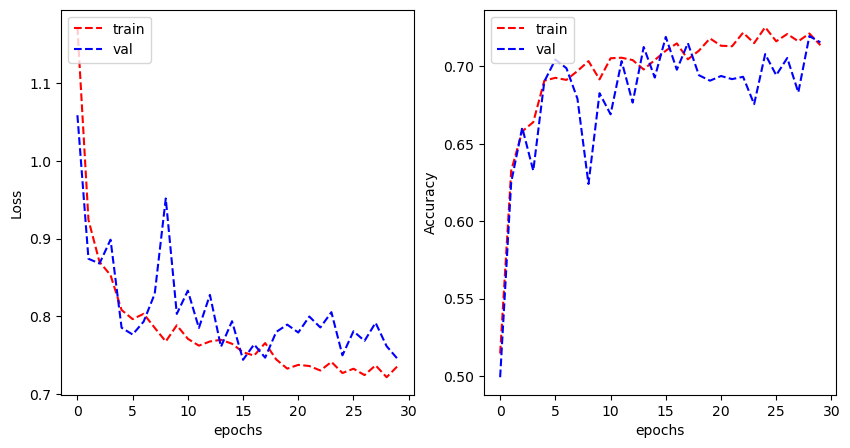

In [101]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_llr.history['loss'], 'r--')
plt.plot(history_llr.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_llr.history['categorical_accuracy'], 'r--')
plt.plot(history_llr.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


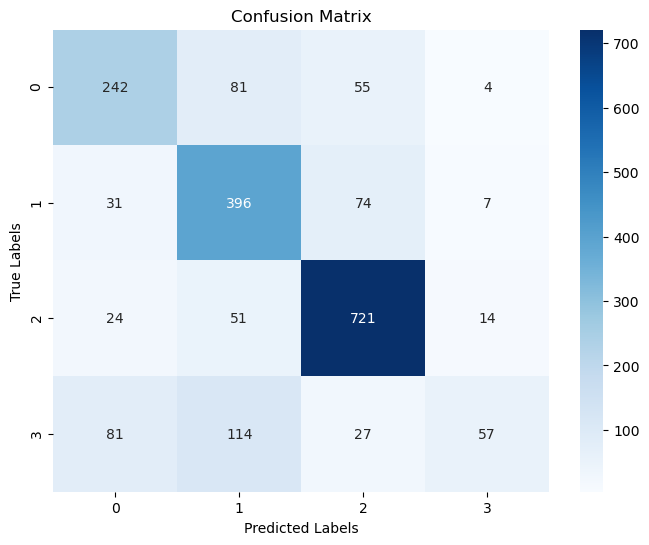

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_llr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [103]:
from sklearn.metrics import classification_report
y_pred_probs = model_llr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.63      0.64       382
           1       0.62      0.78      0.69       508
           2       0.82      0.89      0.85       810
           3       0.70      0.20      0.32       279

    accuracy                           0.72      1979
   macro avg       0.69      0.63      0.62      1979
weighted avg       0.72      0.72      0.69      1979



In [104]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_llr.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7155128852956039
Recall: 0.7155128852956039
F1 Score: 0.7155128852956039
AUC Score: 0.866439067972097


#### Observation 

- Overall performance still worse
- lets try the leNet CNN model instead

## Using LeNet CNN Model (Model 2.1)

In [105]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 4

In [106]:
reg_lambda = 0.01
OUTPUT_CLASSES = 4

model_leNet_baseline = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [107]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_baseline.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_base = model_leNet_baseline.fit(train_generator_type, 
                                    validation_data = validation_generator_type, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


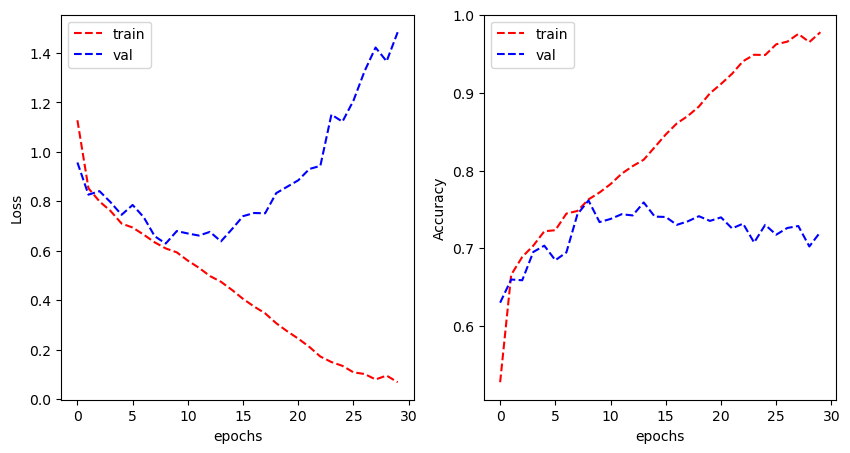

In [108]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_base.history['loss'], 'r--')
plt.plot(history_leNet_base.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_base.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_base.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


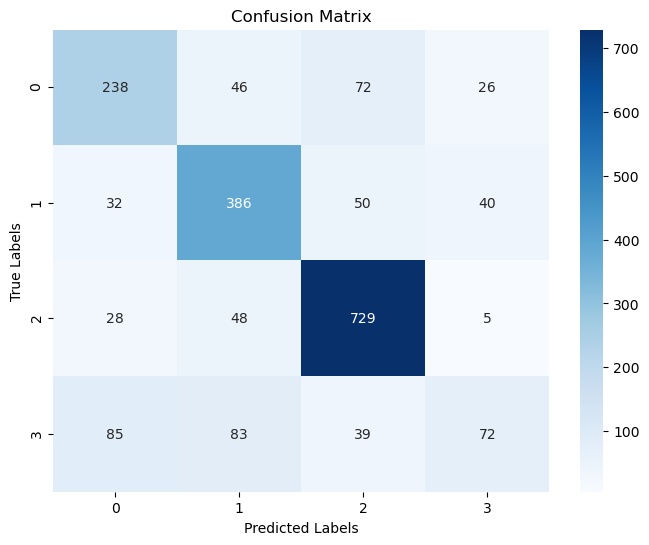

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_baseline.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [110]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_baseline.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       382
           1       0.69      0.76      0.72       508
           2       0.82      0.90      0.86       810
           3       0.50      0.26      0.34       279

    accuracy                           0.72      1979
   macro avg       0.66      0.64      0.64      1979
weighted avg       0.70      0.72      0.70      1979



In [111]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_leNet_baseline.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7200606366851945
Recall: 0.7200606366851945
F1 Score: 0.7200606366851945
AUC Score: 0.847649967379607


#### Observation 

- This model has overfitted
- lets try increasing the epoch value to 50 and check on the model 

## Using LeNet CNN Model with increased epoch (Model 2.2)

`epoch=50`

In [112]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 4

In [113]:
reg_lambda = 0.01
OUTPUT_CLASSES = 4

model_leNet_50 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [114]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_50.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_50 = model_leNet_50.fit(train_generator_type, 
                                    validation_data = validation_generator_type, 
                                    epochs=50, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


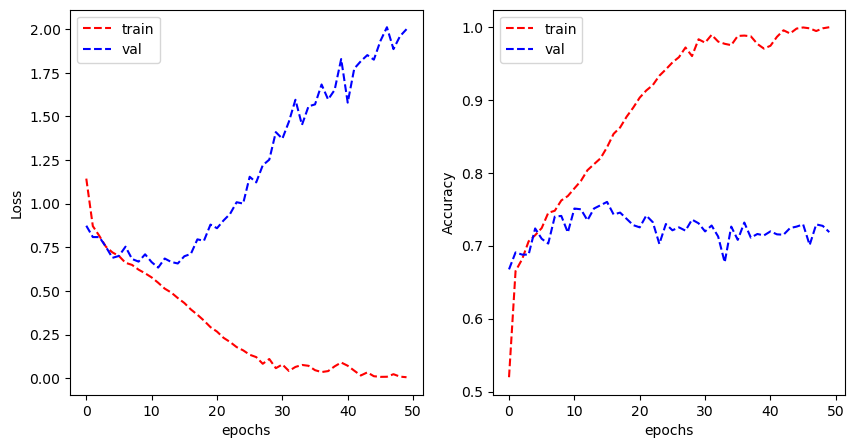

In [115]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_50.history['loss'], 'r--')
plt.plot(history_leNet_50.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_50.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_50.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


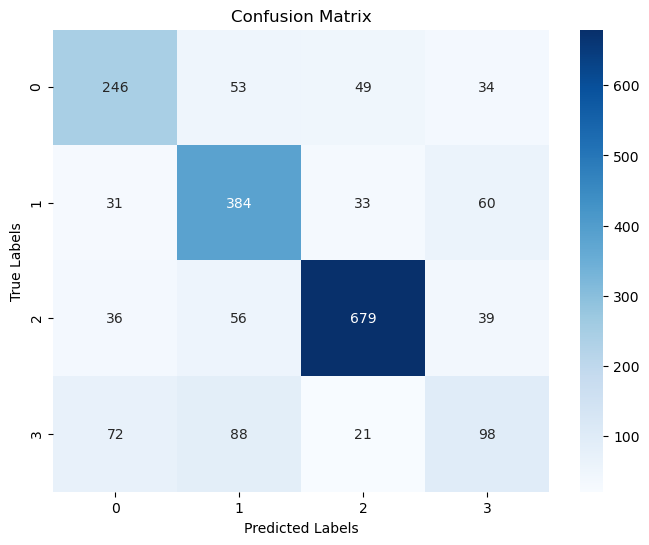

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_50.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [117]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_50.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       382
           1       0.66      0.76      0.71       508
           2       0.87      0.84      0.85       810
           3       0.42      0.35      0.38       279

    accuracy                           0.71      1979
   macro avg       0.65      0.65      0.65      1979
weighted avg       0.71      0.71      0.71      1979



In [118]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_leNet_50.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7109651339060131
Recall: 0.7109651339060131
F1 Score: 0.7109651339060131
AUC Score: 0.8448804804096632


#### Observation 

- increasing epochs has led to more overfitting
- lets try reducing the hidden_layer_dim 

## Using LeNet CNN Model with reduced hidden layer dimension (Model 2.3)

In [119]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 32
OUTPUT_CLASSES = 4

In [120]:
reg_lambda = 0.01
OUTPUT_CLASSES = 4

model_leNet_rhl = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [121]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_rhl.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_rhl = model_leNet_rhl.fit(train_generator_type, 
                                    validation_data = validation_generator_type, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


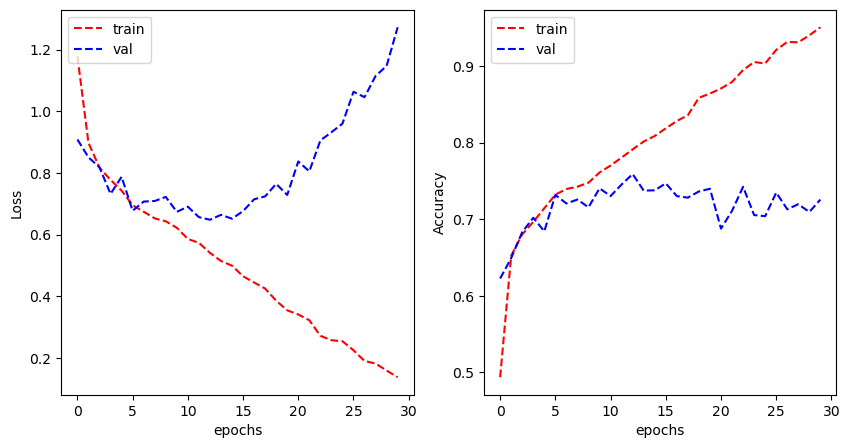

In [122]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_rhl.history['loss'], 'r--')
plt.plot(history_leNet_rhl.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_rhl.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_rhl.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


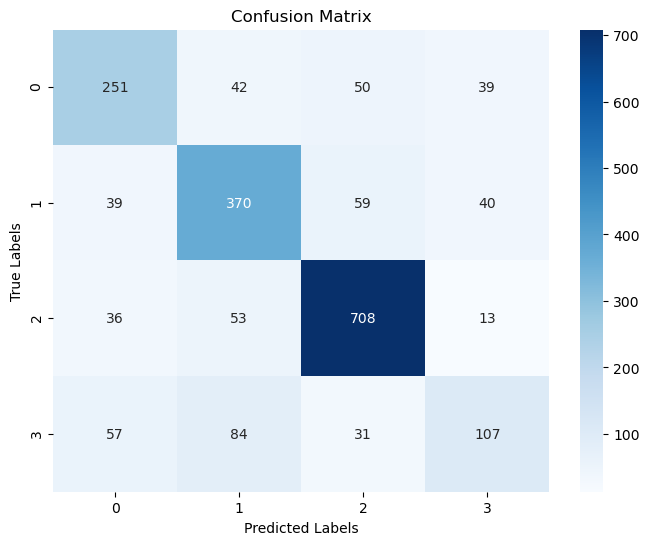

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_rhl.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [124]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_rhl.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       382
           1       0.67      0.73      0.70       508
           2       0.83      0.87      0.85       810
           3       0.54      0.38      0.45       279

    accuracy                           0.73      1979
   macro avg       0.68      0.66      0.66      1979
weighted avg       0.72      0.73      0.72      1979



In [125]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_leNet_rhl.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7256189994946943
Recall: 0.7256189994946943
F1 Score: 0.7256189994946943
AUC Score: 0.8686718416482098


#### Observation 

- This model has performed better than the initial model
- lets try increasing the hidden layer units

## Using LeNet CNN Model further reducing hidden layer dimension (Model 2.4)

In [126]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 16
OUTPUT_CLASSES = 4

In [176]:
reg_lambda = 0.01
OUTPUT_CLASSES = 4

model_leNet_ihl = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [177]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_ihl.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_ihl = model_leNet_ihl.fit(train_generator_type, 
                                    validation_data = validation_generator_type, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


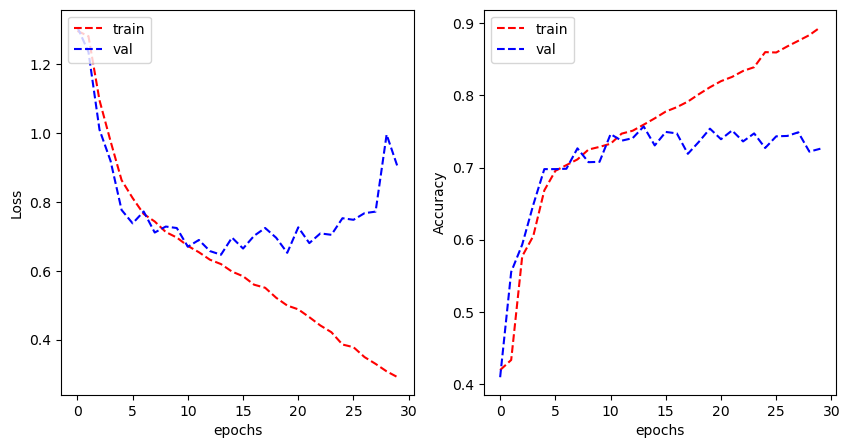

In [178]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_ihl.history['loss'], 'r--')
plt.plot(history_leNet_ihl.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_ihl.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_ihl.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


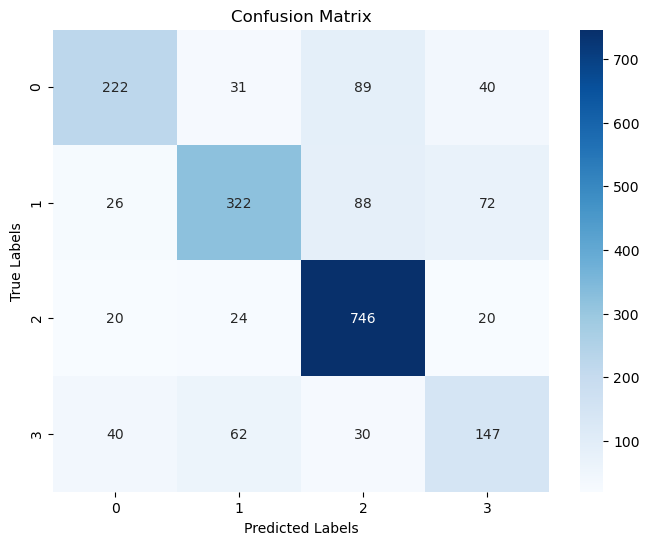

In [179]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_ihl.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [180]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_ihl.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.58      0.64       382
           1       0.73      0.63      0.68       508
           2       0.78      0.92      0.85       810
           3       0.53      0.53      0.53       279

    accuracy                           0.73      1979
   macro avg       0.69      0.67      0.67      1979
weighted avg       0.72      0.73      0.72      1979



In [181]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_leNet_ihl.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7261243052046488
Recall: 0.7261243052046488
F1 Score: 0.7261243052046487
AUC Score: 0.8880854339668117


#### Observation 

- This model has performed worse than the initial model
- lets try changing the learning rate

## Using LeNet CNN Model with learning rate =0.001 (Model 2.5)

In [133]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 16
OUTPUT_CLASSES = 4

In [134]:
reg_lambda = 0.001
OUTPUT_CLASSES = 4

model_leNet_lr = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [135]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_lr.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_lr = model_leNet_lr.fit(train_generator_type, 
                                    validation_data = validation_generator_type, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


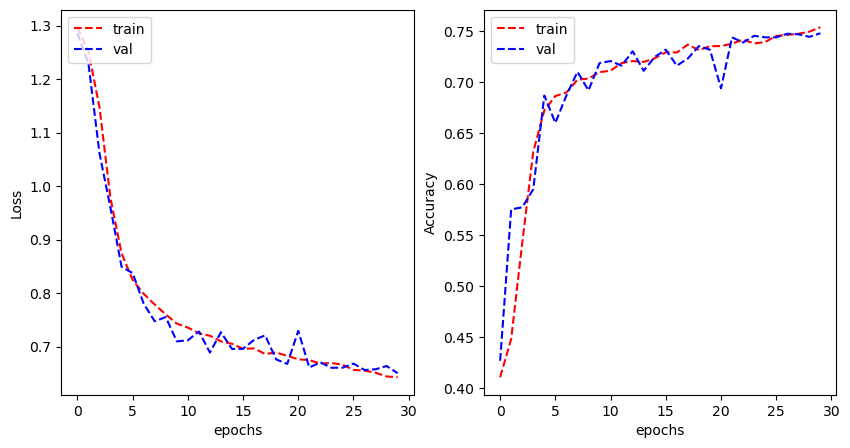

In [136]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_lr.history['loss'], 'r--')
plt.plot(history_leNet_lr.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_lr.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_lr.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


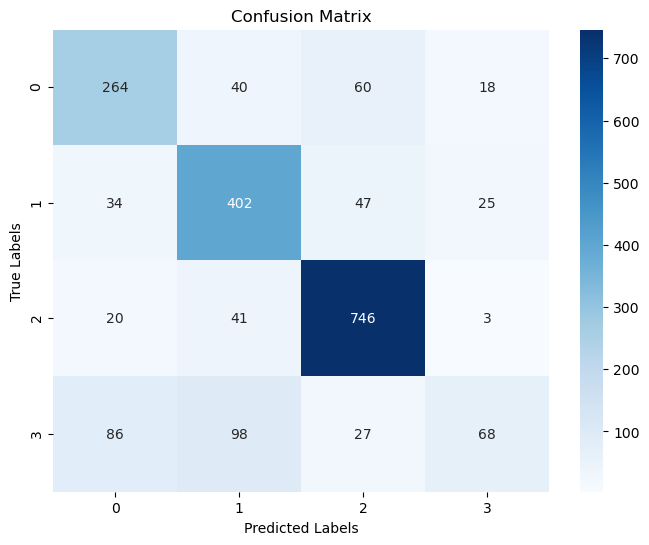

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_lr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [138]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_lr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       382
           1       0.69      0.79      0.74       508
           2       0.85      0.92      0.88       810
           3       0.60      0.24      0.35       279

    accuracy                           0.75      1979
   macro avg       0.70      0.66      0.66      1979
weighted avg       0.73      0.75      0.73      1979



In [139]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_leNet_lr.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7478524507326932
Recall: 0.7478524507326932
F1 Score: 0.7478524507326934
AUC Score: 0.8890154263249638


#### Observation 

- This model has performed much better than the initial model
- lets try changing the learning rate to 0.005

## Using LeNet CNN Model with learning rate =0.005 (Model 2.6)

In [140]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 64
OUTPUT_CLASSES = 4

In [141]:
reg_lambda = 0.005
OUTPUT_CLASSES = 4

model_leNet_5lr = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [142]:
sgd = tf.keras.optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_5lr.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_5lr = model_leNet_5lr.fit(train_generator_type, 
                                    validation_data = validation_generator_type, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


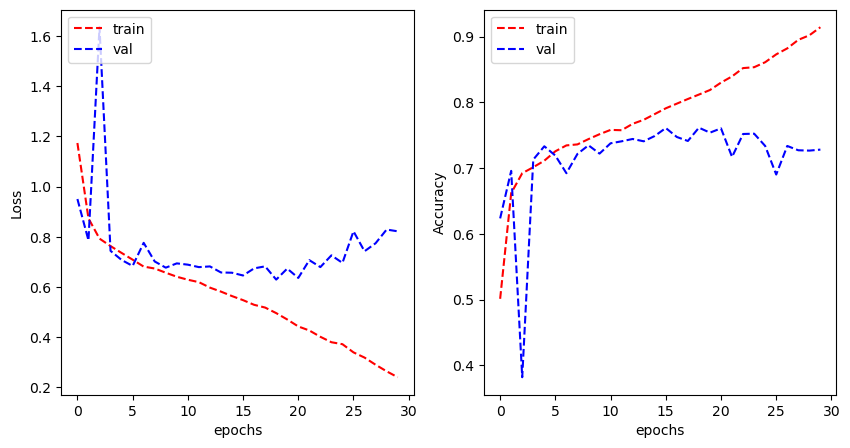

In [143]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_5lr.history['loss'], 'r--')
plt.plot(history_leNet_5lr.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_5lr.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_5lr.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


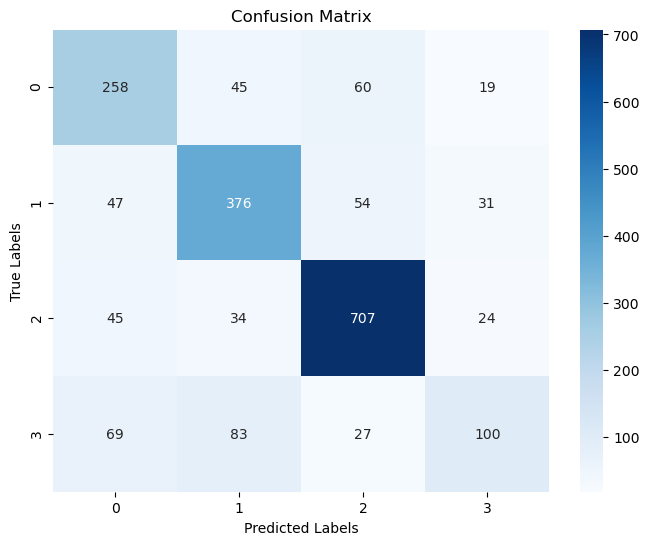

In [144]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_5lr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [145]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_5lr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.68      0.64       382
           1       0.70      0.74      0.72       508
           2       0.83      0.87      0.85       810
           3       0.57      0.36      0.44       279

    accuracy                           0.73      1979
   macro avg       0.68      0.66      0.66      1979
weighted avg       0.72      0.73      0.72      1979



In [146]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_leNet_5lr.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7281455280444669
Recall: 0.7281455280444669
F1 Score: 0.7281455280444669
AUC Score: 0.8641844496863734


#### Observation 

- This model has overfitted
- keeping the learning rate as 0.001

## Reducing the Filters (Model 2.7)

In [182]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 16
OUTPUT_CLASSES = 4

In [189]:
reg_lambda = 0.001
OUTPUT_CLASSES = 4

model_leNet_ik = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [190]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_ik.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_ik = model_leNet_ik.fit(train_generator_type, 
                                    validation_data = validation_generator_type, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


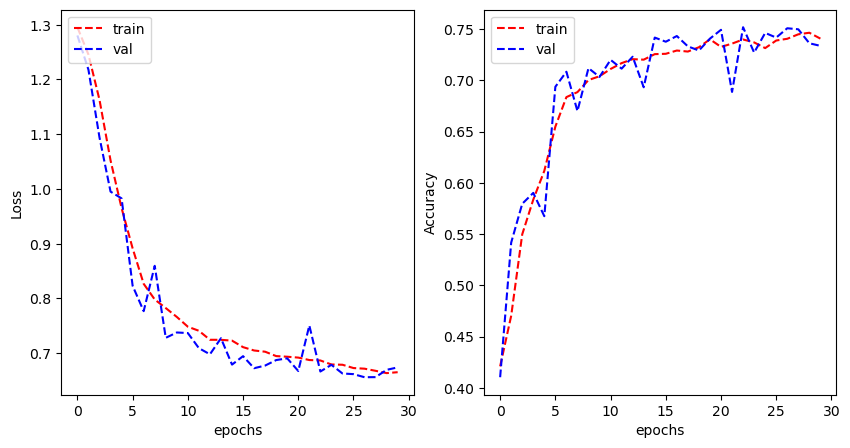

In [191]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_ik.history['loss'], 'r--')
plt.plot(history_leNet_ik.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_ik.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_ik.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


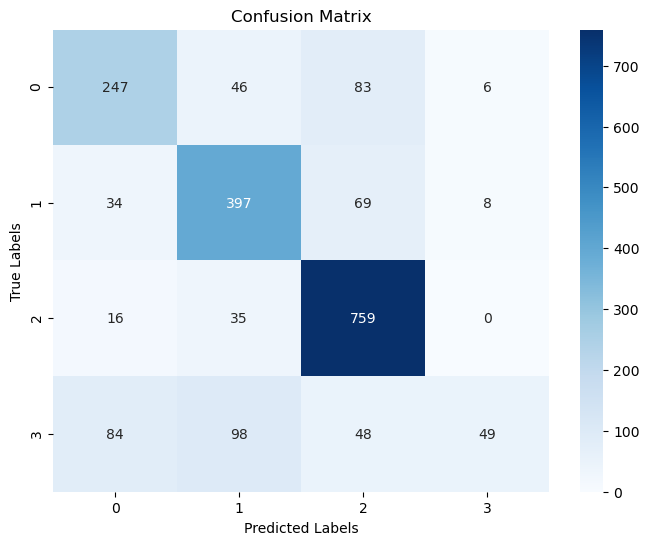

In [192]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_ik.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [193]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_ik.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       382
           1       0.69      0.78      0.73       508
           2       0.79      0.94      0.86       810
           3       0.78      0.18      0.29       279

    accuracy                           0.73      1979
   macro avg       0.73      0.64      0.63      1979
weighted avg       0.74      0.73      0.70      1979



In [194]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_leNet_ik.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7337038908539667
Recall: 0.7337038908539667
F1 Score: 0.7337038908539667
AUC Score: 0.8938266038397042


#### Observation 

- This model has performed worse then the choosen model 2.5
- lets try increasing the kernel size to see if more features are captured

## Increasing the kernel size (Model 2.8)

In [182]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 16
OUTPUT_CLASSES = 4

In [196]:
reg_lambda = 0.001
OUTPUT_CLASSES = 4

model_leNet_iks = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [197]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_iks.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_iks = model_leNet_iks.fit(train_generator_type, 
                                    validation_data = validation_generator_type, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


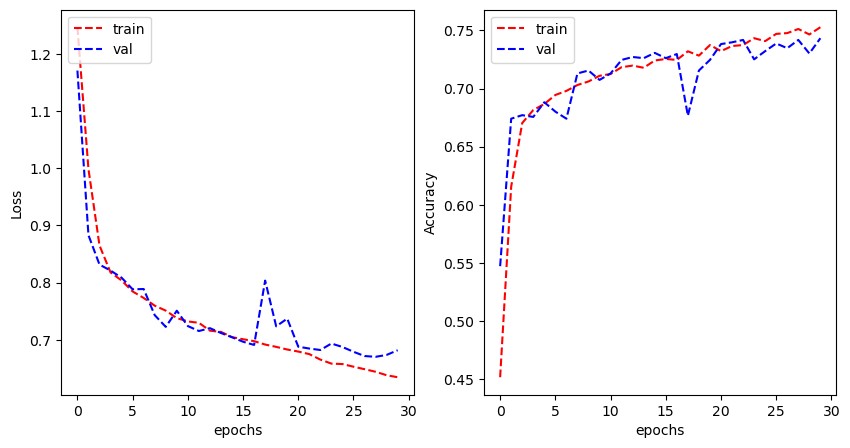

In [198]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_iks.history['loss'], 'r--')
plt.plot(history_leNet_iks.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_iks.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_iks.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


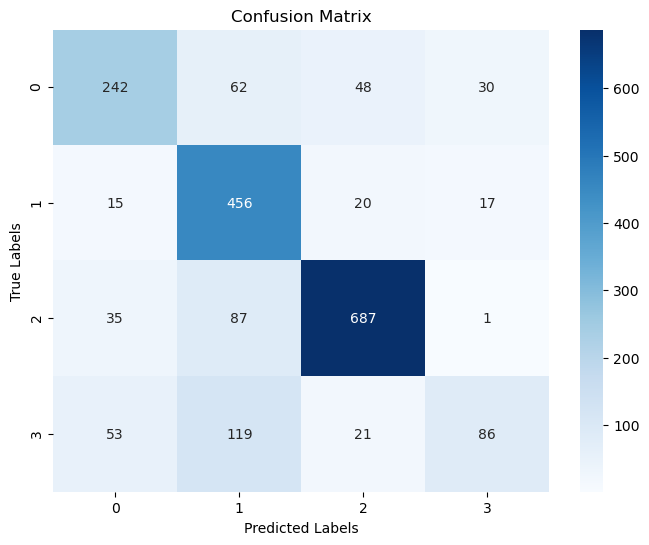

In [199]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_iks.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [200]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_iks.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.63      0.67       382
           1       0.63      0.90      0.74       508
           2       0.89      0.85      0.87       810
           3       0.64      0.31      0.42       279

    accuracy                           0.74      1979
   macro avg       0.71      0.67      0.67      1979
weighted avg       0.75      0.74      0.73      1979



In [201]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_leNet_iks.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7433046993431026
Recall: 0.7433046993431026
F1 Score: 0.7433046993431025
AUC Score: 0.8881016260661293


#### Observation 

- This model didn't perform better then the choosen model 2.5
- lets try increasing the pool size to see if more features are captured

## Increasing the Pool size (Model 2.9)

In [202]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 16
OUTPUT_CLASSES = 4

In [203]:
reg_lambda = 0.001
OUTPUT_CLASSES = 4

model_leNet_ps = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [204]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_ps.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_ps = model_leNet_ps.fit(train_generator_type, 
                                    validation_data = validation_generator_type, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


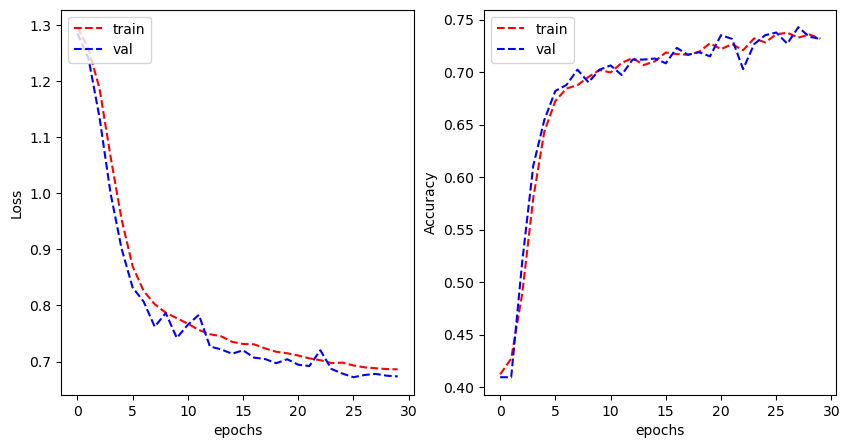

In [205]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_ps.history['loss'], 'r--')
plt.plot(history_leNet_ps.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_ps.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_ps.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


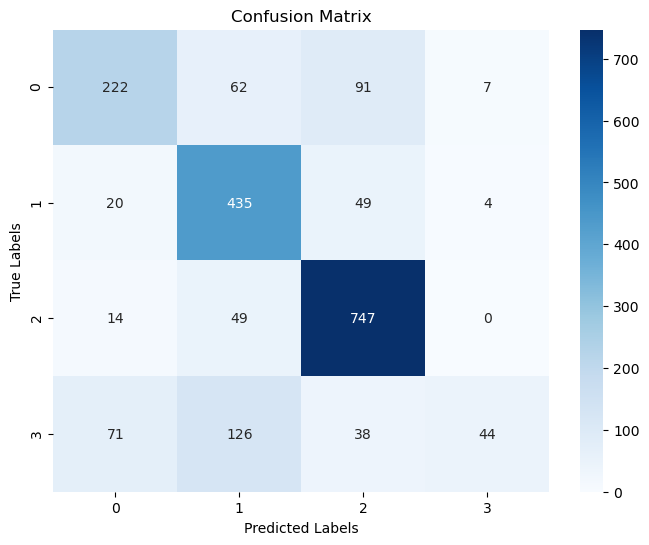

In [206]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_ps.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [207]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_ps.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.58      0.63       382
           1       0.65      0.86      0.74       508
           2       0.81      0.92      0.86       810
           3       0.80      0.16      0.26       279

    accuracy                           0.73      1979
   macro avg       0.73      0.63      0.62      1979
weighted avg       0.74      0.73      0.70      1979



In [208]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_leNet_ps.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7316826680141486
Recall: 0.7316826680141486
F1 Score: 0.7316826680141486
AUC Score: 0.8902465984361954


#### Observation 

- This model didn't perform better then the choosen model 2.5
- The model seems like a good fit
- lets try increasing the pool size to see if more features are captured

## Lets try some dropout =0.1(Model 2.10)

In [202]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 16
OUTPUT_CLASSES = 4

In [211]:
reg_lambda = 0.001
OUTPUT_CLASSES = 4

model_leNet_drop = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [212]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_drop.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_drop = model_leNet_drop.fit(train_generator_type, 
                                    validation_data = validation_generator_type, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


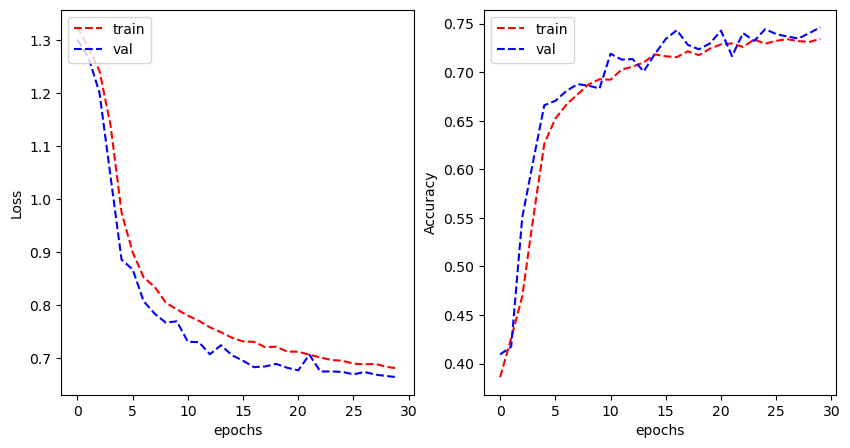

In [213]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_drop.history['loss'], 'r--')
plt.plot(history_leNet_drop.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_drop.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_drop.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


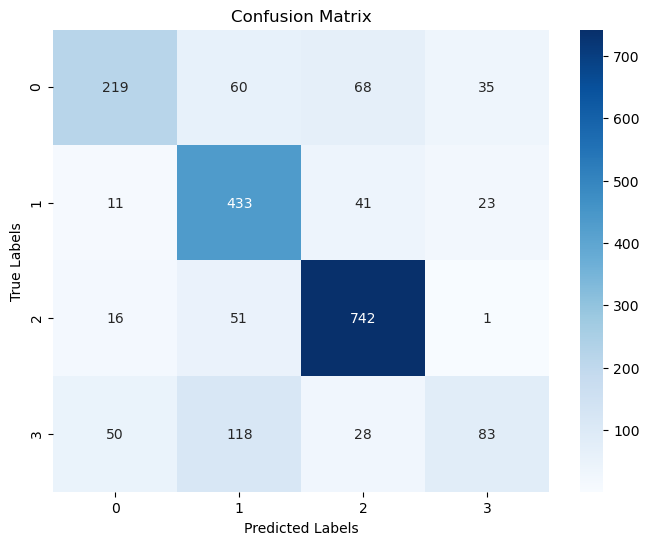

In [214]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_drop.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [215]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_drop.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.57      0.65       382
           1       0.65      0.85      0.74       508
           2       0.84      0.92      0.88       810
           3       0.58      0.30      0.39       279

    accuracy                           0.75      1979
   macro avg       0.71      0.66      0.66      1979
weighted avg       0.74      0.75      0.73      1979



In [216]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_leNet_drop.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7463365336028297
Recall: 0.7463365336028297
F1 Score: 0.7463365336028297
AUC Score: 0.8894210084586762


#### Observation 

- This model dropping layers didn't make any difference
- lets try increasing the dropout

## Lets try some dropout =0.3(Model 2.11)

In [202]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 16
OUTPUT_CLASSES = 4

In [217]:
reg_lambda = 0.001
OUTPUT_CLASSES = 4

model_leNet_drop3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [218]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_drop3.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_drop3 = model_leNet_drop3.fit(train_generator_type, 
                                    validation_data = validation_generator_type, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


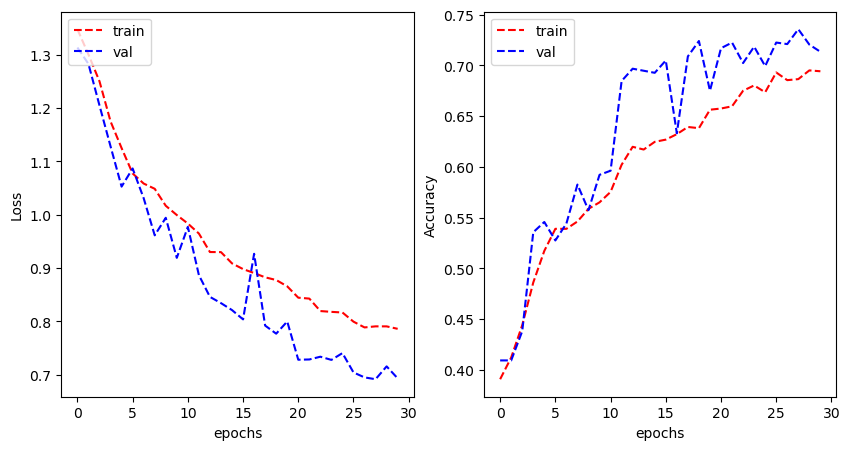

In [219]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_drop3.history['loss'], 'r--')
plt.plot(history_leNet_drop3.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_drop3.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_drop3.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


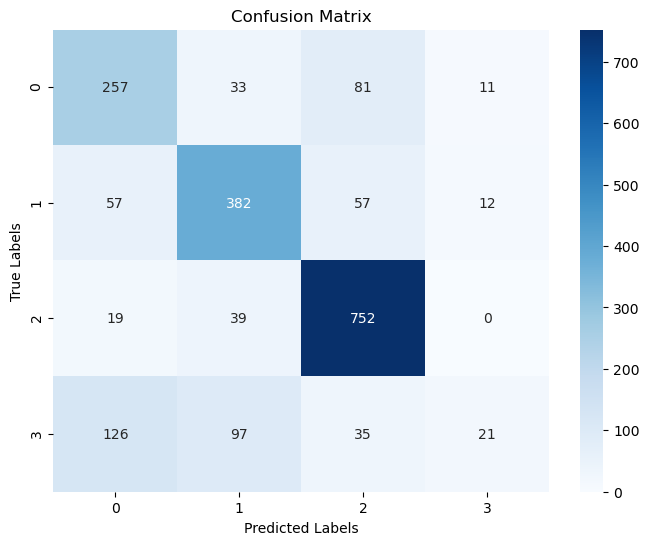

In [220]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_drop3.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [221]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_drop3.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.67      0.61       382
           1       0.69      0.75      0.72       508
           2       0.81      0.93      0.87       810
           3       0.48      0.08      0.13       279

    accuracy                           0.71      1979
   macro avg       0.64      0.61      0.58      1979
weighted avg       0.69      0.71      0.68      1979



In [222]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_leNet_drop3.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7134916624557858
Recall: 0.7134916624557858
F1 Score: 0.7134916624557858
AUC Score: 0.8776747765431508


#### Observation 

- This model performance has become worse
- lets with model 2.5 

## Data Augmentation(model 2.12)

adding data augmentation to introduce more generalisation

In [228]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by 10%
    height_shift_range=0.1,  # Randomly shift images vertically by 10%
    zoom_range=0.1,  # Randomly zoom in on images by 10%
    horizontal_flip=True  # Randomly flip images horizontally
)


batch_size = 32

train_generator_typeaug = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image_path",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 4 classes.


In [229]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 16
OUTPUT_CLASSES = 4

In [230]:
reg_lambda = 0.001
OUTPUT_CLASSES = 4

model_leNet_au = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [231]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_au.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_au = model_leNet_au.fit(train_generator_typeaug, 
                                    validation_data = validation_generator_type, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


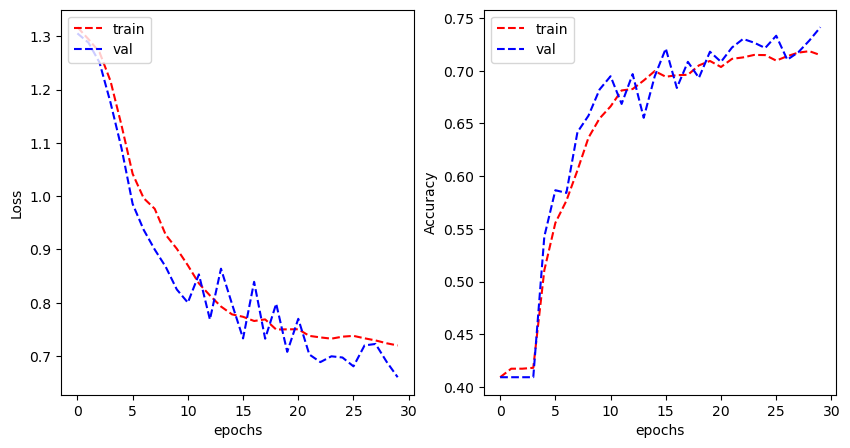

In [232]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_au.history['loss'], 'r--')
plt.plot(history_leNet_au.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_au.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_au.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


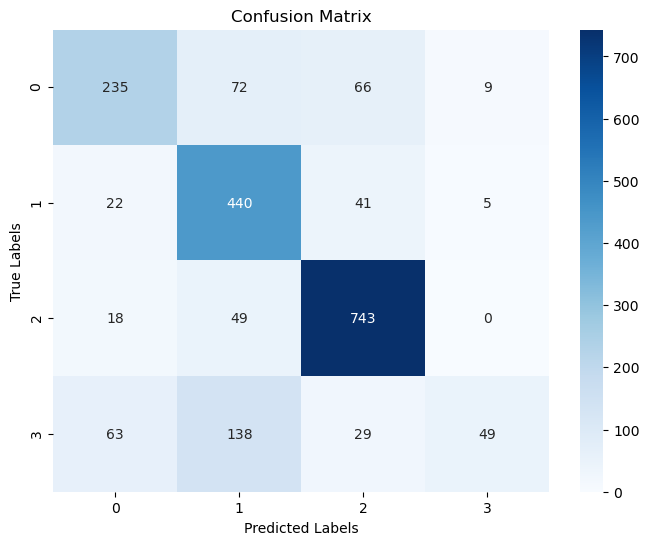

In [233]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_au.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [234]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_au.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.62      0.65       382
           1       0.63      0.87      0.73       508
           2       0.85      0.92      0.88       810
           3       0.78      0.18      0.29       279

    accuracy                           0.74      1979
   macro avg       0.74      0.64      0.64      1979
weighted avg       0.75      0.74      0.71      1979



In [235]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = model_leNet_au.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1979 validated image filenames belonging to 4 classes.
Precision: 0.7412834765032845
Recall: 0.7412834765032845
F1 Score: 0.7412834765032844
AUC Score: 0.8871836335071045


#### Observation 

- The model performance is same that means it is generalizing well
- lets continue with this model

#### saving this model

In [236]:
model_leNet_au.save('model.h5')


model_leNet_au.save_weights('model_weights.h5')

## Semi supervised learning

In [237]:
import pandas as pd
from sklearn.utils import shuffle

# Assuming train_data and extra_data are pandas DataFrames

# Shuffle the extra_data DataFrame
extra_data_shuffled = shuffle(extra_data)

# Select a subset of extra_data with the same size as train_data
extra_data_subset = extra_data_shuffled.sample(n=len(train_data))



In [247]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define the hyperparameters
reg_lambda = 0.001
OUTPUT_CLASSES = 4
batch_size = 32

labeled_data = train_data['image_path'].values  # Extract the image paths as a NumPy array

labeled_labels = train_data['cellType'].values  # Extract the labels as a NumPy array
unlabeled_data = extra_data_subset['image_path'].values

# Create the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by 10%
    height_shift_range=0.1,  # Randomly shift images vertically by 10%
    zoom_range=0.1,  # Randomly zoom in on images by 10%
    horizontal_flip=True  # Randomly flip images horizontally
)

labeled_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical'
)

unlabeled_generator = train_datagen.flow_from_dataframe(
    dataframe=extra_data_subset,
    directory='./',
    x_col="image_path",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

# Build your own model
semimodel = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])


# Compile the model
optimizer = Adam(learning_rate=reg_lambda)
semimodel.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on labeled data
semimodel.fit(
    labeled_generator,
    epochs=30
)


Found 5937 validated image filenames belonging to 4 classes.
Found 5937 validated image filenames.
Epoch 1/30
186/186 [==============================] - 7s 36ms/step - loss: 1.0816 - accuracy: 0.5523
Epoch 2/30
186/186 [==============================] - 7s 36ms/step - loss: 0.8587 - accuracy: 0.6618
Epoch 3/30
186/186 [==============================] - 7s 36ms/step - loss: 0.8310 - accuracy: 0.6737
Epoch 4/30
186/186 [==============================] - 7s 36ms/step - loss: 0.7686 - accuracy: 0.6995
Epoch 5/30
186/186 [==============================] - 7s 36ms/step - loss: 0.7636 - accuracy: 0.7012
Epoch 6/30
186/186 [==============================] - 7s 36ms/step - loss: 0.7595 - accuracy: 0.7019
Epoch 7/30
186/186 [==============================] - 7s 37ms/step - loss: 0.7406 - accuracy: 0.7094
Epoch 8/30
186/186 [==============================] - 7s 36ms/step - loss: 0.7208 - accuracy: 0.7180
Epoch 9/30
186/186 [==============================] - 7s 36ms/step - loss: 0.7298 - accuracy:

In [248]:
pseudo_labels = semimodel.predict(unlabeled_generator)


In [249]:
pseudo_labels

array([[0.18127212, 0.21355876, 0.9949647 , 0.13036367],
       [0.86843693, 0.04456836, 0.9277886 , 0.08892888],
       [0.48447272, 0.7077154 , 0.04870167, 0.5696039 ],
       ...,
       [0.01689005, 0.99791086, 0.0177559 , 0.62575716],
       [0.40330255, 0.7286645 , 0.4233191 , 0.34644067],
       [0.6088884 , 0.03777868, 0.9993062 , 0.03720322]], dtype=float32)

In [250]:
pseudo_labels = tf.argmax(pseudo_labels, axis=1)

In [251]:
pseudo_labels_scalar = pseudo_labels.numpy()


In [252]:
pseudo_labels_scalar

array([2, 2, 1, ..., 1, 1, 2])

In [253]:
combined_data = pd.DataFrame({
    'image_path': list(labeled_data) + list(unlabeled_data),
    'cellType': list(labeled_labels) + list(pseudo_labels_scalar)
})

In [254]:
combined_data['cellType']=combined_data['cellType'].astype('str')

In [255]:
combined_generator = datagen.flow_from_dataframe(
    dataframe=combined_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model on combined labeled and pseudo-labeled data
semimodel.fit(
    combined_generator,
    epochs=10
)

# Evaluate on validation data
validation_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical'
)

loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


Found 11874 validated image filenames belonging to 4 classes.
Epoch 1/10
372/372 [==============================] - 7s 19ms/step - loss: 0.4459 - accuracy: 0.8335
Epoch 2/10
372/372 [==============================] - 7s 19ms/step - loss: 0.4197 - accuracy: 0.8416
Epoch 3/10
372/372 [==============================] - 7s 19ms/step - loss: 0.4027 - accuracy: 0.8473
Epoch 4/10
372/372 [==============================] - 7s 19ms/step - loss: 0.4083 - accuracy: 0.8420
Epoch 5/10
372/372 [==============================] - 7s 19ms/step - loss: 0.3728 - accuracy: 0.8597
Epoch 6/10
372/372 [==============================] - 7s 19ms/step - loss: 0.3703 - accuracy: 0.8596
Epoch 7/10
372/372 [==============================] - 7s 19ms/step - loss: 0.3466 - accuracy: 0.8675
Epoch 8/10
372/372 [==============================] - 7s 19ms/step - loss: 0.3426 - accuracy: 0.8697
Epoch 9/10
372/372 [==============================] - 7s 20ms/step - loss: 0.3209 - accuracy: 0.8776
Epoch 10/10
372/372 [========

## Using Test data on the choosen model (2.9)

In [257]:
test_data['cellType'] = test_data['cellType'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="image_path",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 1980 validated image filenames belonging to 4 classes.


/var/folders/sc/1ljq9fgn41xfwkqd6rv0dzgm0000gn/T/ipykernel_22356/3783337059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['cellType'] = test_data['cellType'].astype('str')


In [258]:
model_leNet_au.evaluate(test_generator)

62/62 [==============================] - 1s 22ms/step - loss: 0.6990 - categorical_accuracy: 0.7273


[0.698983371257782, 0.7272727489471436]

In [259]:
semimodel.evaluate(test_generator)

62/62 [==============================] - 1s 12ms/step - loss: 0.6941 - accuracy: 0.7571


[0.6941038370132446, 0.7570707201957703]

In [261]:
from sklearn.metrics import classification_report
y_pred_probs = semimodel.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       391
           1       0.75      0.70      0.72       496
           2       0.80      0.94      0.87       791
           3       0.61      0.47      0.53       302

    accuracy                           0.76      1980
   macro avg       0.73      0.70      0.71      1980
weighted avg       0.75      0.76      0.75      1980



In [260]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import normalize

test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities
y_pred_probs = semimodel.predict(test_generator)
y_true_labels = test_generator.classes

# Normalize predicted probabilities
y_pred_probs = normalize(y_pred_probs, norm='l1', axis=1)

# Convert predicted probabilities to binary class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='micro')
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
f1 = f1_score(y_true_labels, y_pred_labels, average='micro')

# Calculate ROC AUC score using one-vs-rest strategy
auc = roc_auc_score(y_true_labels, y_pred_probs, multi_class='ovr')

# Print the results

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


Found 1980 validated image filenames belonging to 4 classes.
Precision: 0.7570707070707071
Recall: 0.7570707070707071
F1 Score: 0.7570707070707071
AUC Score: 0.8957534613372928
